In [3]:
import os
import socket
import subprocess
import pandas as pd
import io
from contextlib import redirect_stdout
import itertools
import warnings
from datetime import datetime
import time
import timeout_decorator
import numpy as np
import matplotlib.pyplot as plt



In [4]:
def islocal(): return socket.gethostname()=="rc-idsia-macBook.local"
def isserver(): return socket.gethostname()=="ec6120930b2d"
def strdate(): return datetime.today().strftime('%Y-%m-%d-%H-%M-%S')


In [5]:
if islocal():
    prj_path = "/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA"
    os.environ['JAVA_HOME'] = "/Library/Java/JavaVirtualMachines/openjdk-12.0.1.jdk/Contents/Home"
elif isserver():
    prj_path="/home/rcabanas/work_java_crema/crema/CreMA"
else:
    warnings.warn("Unknown server, set prj_path variable manually.")
os.chdir(prj_path)
!pwd

/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA


In [6]:
exp_folder = f"{prj_path}/papers/pgm20/experiments/"
log_folder = f"{exp_folder}/logs/"
res_folder = f"{exp_folder}/results/"
jarfile=f"{prj_path}/target/CreMA-0.1.1-SNAPSHOT-jar-with-dependencies.jar"

In [5]:
!mvn install:install-file -Dfile=./external/lpsolve55j.jar -DgroupId=net.sf.lpsolve -DartifactId=lp_solve -Dversion=5.5.2 -Dpackaging=jar

[INFO] Scanning for projects...
[WARNING] 
[WARNING] Some problems were encountered while building the effective model for ch.idsia:CreMA:jar:0.1.1-SNAPSHOT
[WARNING] 'dependencies.dependency.(groupId:artifactId:type:classifier)' must be unique: org.apache.commons:commons-math3:jar -> duplicate declaration of version 3.6.1 @ line 125, column 15
[WARNING] 
[WARNING] It is highly recommended to fix these problems because they threaten the stability of your build.
[WARNING] 
[WARNING] For this reason, future Maven versions might no longer support building such malformed projects.
[WARNING] 
[INFO] 
[INFO] ---------------------------< ch.idsia:CreMA >---------------------------
[INFO] Building Credal Model Algorithms 0.1.1-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-install-plugin:2.4:install-file (default-cli) @ CreMA ---
[INFO] Installing /home/rcabanas/work_java_crema/crema/CreMA/external/lpsolve55j.jar to /home/rcaba

In [13]:
!mvn install:install-file -Dfile=./external/polco.jar -DgroupId=ch.javasoft.polco -DartifactId=polco -Dversion=4.7.1 -Dpackaging=jar

[INFO] Scanning for projects...
[WARNING] 
[WARNING] Some problems were encountered while building the effective model for ch.idsia:CreMA:jar:0.1.1-SNAPSHOT
[WARNING] 'dependencies.dependency.(groupId:artifactId:type:classifier)' must be unique: org.apache.commons:commons-math3:jar -> duplicate declaration of version 3.6.1 @ line 125, column 15
[WARNING] 
[WARNING] It is highly recommended to fix these problems because they threaten the stability of your build.
[WARNING] 
[WARNING] For this reason, future Maven versions might no longer support building such malformed projects.
[WARNING] 
[INFO] 
[INFO] ---------------------------< ch.idsia:CreMA >---------------------------
[INFO] Building Credal Model Algorithms 0.1.1-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-install-plugin:2.4:install-file (default-cli) @ CreMA ---
[INFO] Installing /Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/external/polco.jar to

In [14]:
!mvn clean compile assembly:single

[INFO] Scanning for projects...
[WARNING] 
[WARNING] Some problems were encountered while building the effective model for ch.idsia:CreMA:jar:0.1.1-SNAPSHOT
[WARNING] 'dependencies.dependency.(groupId:artifactId:type:classifier)' must be unique: org.apache.commons:commons-math3:jar -> duplicate declaration of version 3.6.1 @ line 125, column 15
[WARNING] 
[WARNING] It is highly recommended to fix these problems because they threaten the stability of your build.
[WARNING] 
[WARNING] For this reason, future Maven versions might no longer support building such malformed projects.
[WARNING] 
[INFO] 
[INFO] ---------------------------< ch.idsia:CreMA >---------------------------
[INFO] Building Credal Model Algorithms 0.1.1-SNAPSHOT
[INFO] --------------------------------[ jar ]---------------------------------
[INFO] 
[INFO] --- maven-clean-plugin:2.5:clean (default-clean) @ CreMA ---
[INFO] Deleting /Users/rcabanas/GoogleDrive/IDSIA/causality/dev/crema/CreMA/target
[INFO] 
[INFO] --- mave

[INFO] META-INF/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] META-INF/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] META-INF/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] org/ already added, skipping
[INFO] META-INF/maven/ already added, skipping
[INFO] META-INF/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] org/ already added, skipping
[INFO] org/apache/ already added, skipping
[INFO] org/apache/commons/ already added, skipping
[INFO] META-INF/LICENSE.txt already added, skipping
[INFO] META-INF/NOTICE.txt already added, skipping
[INFO] META-INF/maven/ already added, skipping
[INFO] META-INF/maven/org.apache.commons/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] META-INF/ already added, skipping
[INFO] org/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] META-INF/ a

[INFO] META-INF/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] META-INF/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] META-INF/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] org/ already added, skipping
[INFO] META-INF/maven/ already added, skipping
[INFO] META-INF/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] org/ already added, skipping
[INFO] org/apache/ already added, skipping
[INFO] org/apache/commons/ already added, skipping
[INFO] META-INF/LICENSE.txt already added, skipping
[INFO] META-INF/NOTICE.txt already added, skipping
[INFO] META-INF/maven/ already added, skipping
[INFO] META-INF/maven/org.apache.commons/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] META-INF/ already added, skipping
[INFO] org/ already added, skipping
[INFO] META-INF/MANIFEST.MF already added, skipping
[INFO] META-INF/ a

In [64]:
#@timeout_decorator.timeout(30*60)
def run_java(jarfile, javafile):
    cmd=f"java -cp {jarfile} {javafile}"
    result =subprocess.run(cmd, universal_newlines = True, shell=True,stdout = subprocess.PIPE)
    print(result.stdout)
    return result

# ChainNonMarkovian 6 5 1 -1 0 CCALP 1234
def run_chain(model, N, exovarsize, target, obsvar, dovar, method, seed):
    
    if obsvar<0: obsvar = N + obsvar;
    elif obsvar is None: obsvar = -1;
        
    if dovar<0: dovar = N + dovar;
    elif dovar is None: dovar = -1;
    
    javafile = f"{exp_folder}/RunExperiments.java {model} {N} {exovarsize} {target} {obsvar} {dovar} {method} {seed}"  
    try:
        result = run_java(jarfile, javafile)
        output = [float(x) for x in result.stdout.splitlines()[-1].split(",")]
    except:
        output = [float("inf"),float("inf"),float("nan")]
        
    return output

def run_chain_markovian(N=4, exovarsize=6, target=None, obsvar=-1, dovar=0, method="CVE", seed=1234):    
    return run_chain("ChainMarkovian", N, exovarsize, target or N//2, obsvar, dovar, method, seed)

def run_chain_nonmarkovian(N=4, exovarsize=6, target=None, obsvar=-1, dovar=-1, method="CVE", seed=1234):
    return run_chain("ChainNonMarkovian", N, exovarsize, target or N//1, obsvar, dovar, method, seed)


In [66]:
run_chain_markovian(N=5, method="CCVE")


ChainMarkovian
   N=5 exovarsize=6 target=2 obsvar=4 dovar=0 method=CCVE seed=1234
Running experiments...
set timeout 600 s.
Warm-up #0 in 841.123 ms.
set timeout 600 s.
Warm-up #1 in 243.062 ms.
set timeout 600 s.
Warm-up #2 in 227.703 ms.
set timeout 300 s.
Measurement #0 in 190.098 ms. size=0.0
set timeout 300 s.
Measurement #1 in 166.925 ms. size=0.0
set timeout 300 s.
Measurement #2 in 141.425 ms. size=0.0
set timeout 300 s.
Measurement #3 in 159.013 ms. size=0.0
set timeout 300 s.
Measurement #4 in 130.038 ms. size=0.0
set timeout 300 s.
Measurement #5 in 109.593 ms. size=0.0
set timeout 300 s.
Measurement #6 in 109.167 ms. size=0.0
set timeout 300 s.
Measurement #7 in 126.591 ms. size=0.0
set timeout 300 s.
Measurement #8 in 101.967 ms. size=0.0
set timeout 300 s.
Measurement #9 in 95.909 ms. size=0.0
133.07260000000002,41.422200000000004,0.0,0.9253716881664275,0.9253716881664275



[133.07260000000002,
 41.422200000000004,
 0.0,
 0.9253716881664275,
 0.9253716881664275]

In [9]:
run_chain_nonmarkovian(N=3, exovarsize=6, method="CCALP", seed=543)
run_chain_nonmarkovian(N=3, exovarsize=6, method="CCALPeps", seed=543)

[inf, inf, nan]

In [61]:
def run_experiments(f, args, outkeys=("time", "query_time", "size", "lowerbound", "upperbound")):

    non_evaluable = []
                      
    def is_evaluable(args): 
        return not {k:v for (k,v) in args.items() if k!="N"} in \
    [{k:v for (k,v) in a.items() if k not in ["N", "seed"]} for a in non_evaluable]
         
        
    result = pd.DataFrame(columns=list(args.keys())+list(outkeys))
    log_file = f"{log_folder}{strdate()}_{f.__name__}.txt"

    for v in itertools.product(*list(args.values())):
        
        argsv = dict(zip(list(args.keys()), v))
        
        strio = io.StringIO()
        with open(log_file, 'a+') as logger:
            with redirect_stdout(strio):
                if is_evaluable(argsv):
                    outvals = f(**argsv)
                    if np.isnan(outvals).any(): non_evaluable.append(argsv)
                else:
                    outvals=[float("nan")]*len(outkeys)
            logger.write(strio.getvalue())
        result = result.append({**argsv, **dict(zip(list(outkeys), outvals))}, ignore_index=True)
        print(dict(result.iloc[-1]))
    
    return result

In [68]:
args = {"N":list(range(5,15)), "seed":[1234], "method":["CVE", "CCVE", "CCALPeps"]}

In [69]:
results1 = run_experiments(run_chain_markovian, args)
res_file = f"{res_folder}{strdate()}_chain_markovian.csv"
results1.to_csv(res_file)
results1

{'N': 5, 'seed': 1234, 'method': 'CVE', 'time': 3.0796, 'query_time': 3.0636, 'size': 0.0, 'lowerbound': 0.9253716881664275, 'upperbound': 0.9253716881664275}
{'N': 5, 'seed': 1234, 'method': 'CCVE', 'time': 139.2422, 'query_time': 45.3368, 'size': 0.0, 'lowerbound': 0.9253716881664275, 'upperbound': 0.9253716881664275}
{'N': 5, 'seed': 1234, 'method': 'CCALPeps', 'time': 460.6804, 'query_time': 457.55820000000006, 'size': 1.1102230246251565e-16, 'lowerbound': 0.9443987446020042, 'upperbound': 0.9443987446020042}
{'N': 6, 'seed': 1234, 'method': 'CVE', 'time': 4.1986, 'query_time': 4.1847, 'size': 0.0, 'lowerbound': 0.9511876167902436, 'upperbound': 0.9511876167902436}
{'N': 6, 'seed': 1234, 'method': 'CCVE', 'time': 232.2117, 'query_time': 124.45139999999999, 'size': 0.0, 'lowerbound': 0.9511876167902436, 'upperbound': 0.9511876167902436}
{'N': 6, 'seed': 1234, 'method': 'CCALPeps', 'time': 772.174, 'query_time': 768.6404, 'size': 8.881784197001253e-17, 'lowerbound': 0.947733924457139

,N,seed,method,time,query_time,size,lowerbound,upperbound
0,5,1234,CVE,3.0796,3.0636,0.000000e+00,0.925372,0.925372
1,5,1234,CCVE,139.2422,45.3368,0.000000e+00,0.925372,0.925372
2,5,1234,CCALPeps,460.6804,457.5582,1.110223e-16,0.944399,0.944399
3,6,1234,CVE,4.1986,4.1847,0.000000e+00,0.951188,0.951188
4,6,1234,CCVE,232.2117,124.4514,0.000000e+00,0.951188,0.951188
5,6,1234,CCALPeps,772.1740,768.6404,8.881784e-17,0.947734,0.947734
6,7,1234,CVE,13.8872,13.8697,0.000000e+00,0.951088,0.951088
7,7,1234,CCVE,inf,inf,NaN,NaN,NaN
8,7,1234,CCALPeps,inf,inf,NaN,NaN,NaN
9,8,1234,CVE,inf,inf,NaN,NaN,NaN


In [ ]:
args = {"N":list(range(5,30,2)), "seed":[1234], "method":["CVE", "CCVE", "CCALPeps"]}

In [ ]:
results2 = run_experiments(run_chain_nonmarkovian, args)
res_file = f"{res_folder}{strdate()}_chain_nonmarkovian.csv"
results2.to_csv(res_file)
results2

{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CVE', 'time': 1.5131000000000001, 'query_time': 1.4929999999999999, 'size': 0.0}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCVE', 'time': 80.23440000000001, 'query_time': 7.7152, 'size': 0.0}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALP', 'time': 241.88160000000002, 'query_time': 239.42350000000002, 'size': 1.1102230246251565e-16}
{'N': 5, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALPeps', 'time': 543.8916999999999, 'query_time': 541.5652, 'size': 4.751537370650816e-06}
{'N': 7, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CVE', 'time': 2.4042000000000003, 'query_time': 2.3845, 'size': 0.0}
{'N': 7, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCVE', 'time': 117.3578, 'query_time': 21.2225, 'size': 0.0}
{'N': 7, 'exovarsize': 6, 'dovar': 0, 'seed': 1234, 'method': 'CCALP', 'time': 348.9792, 'query_time': 346.4026, 'size': 1.9428902930940238e-17}
{'

In [52]:
methods = np.unique(results1["method"].to_numpy())

In [53]:
results1.filter(items=["N","method","time"])

,N,method,time
0,6,CVE,3.9199
1,6,CCVE,240.1572
2,6,CCALP,242.1709
3,6,CCALPeps,530.1605
4,7,CVE,7.1355
5,7,CCVE,inf
6,7,CCALP,320.1134
7,7,CCALPeps,inf
8,8,CVE,20.2610
9,8,CCVE,inf


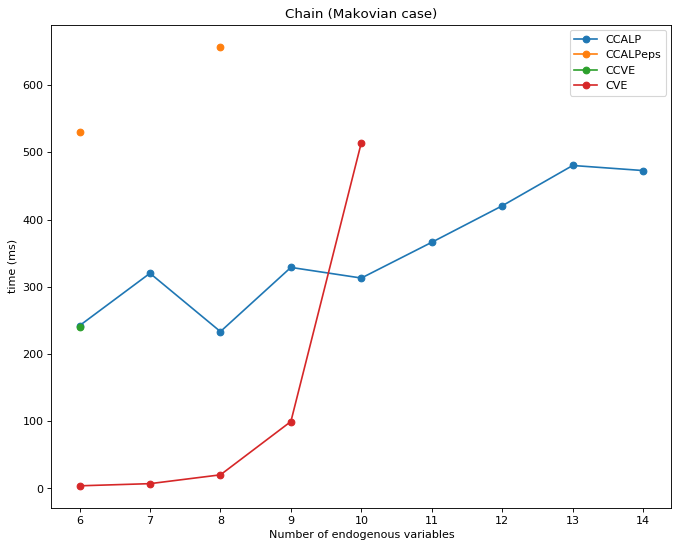

In [54]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

N = np.unique(results1["N"].to_numpy())

for m in methods:
    #if m not in ["CCVE"]:
        data = results1.query(f"method=='{m}'").filter(items=["time"]).to_numpy()
        plt.plot(N, data, marker='o', label=m)
        plt.legend()
        #ax1.set_yscale('log')
        
plt.ylabel("time (ms)")
plt.xlabel("Number of endogenous variables")

plt.title("Chain (Makovian case)")

plt.show()

In [ ]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')

N = np.unique(results2["N"].to_numpy())


for m in methods:
    #if m not in ["CCVE"]:

        data = results2.query(f"method=='{m}'").filter(items=["time"]).to_numpy()
        plt.plot(N, data, marker='o', label=m)

        #data = results2.query(f"method=='{m}'").filter(items=["query_time"]).to_numpy()
        #ax2.plot(N, data, marker='o', label=m)
        #ax1.set_yscale('log')

        plt.legend()   
        
plt.ylabel("time (ms)")
plt.title("Chain (Non-Makovian case)")
plt.xlabel("Number of endogenous variables")

fig.show()